In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
titanic_data = pd.read_csv("./datasets/titanic/train.csv")
test_data = pd.read_csv("./datasets/titanic/test.csv")
# Examine the training data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


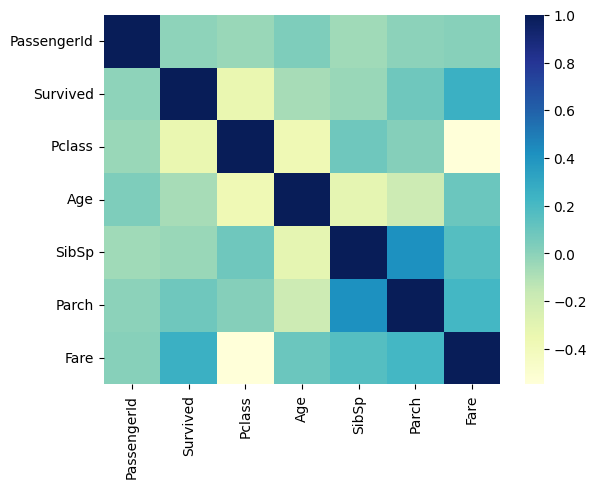

In [3]:
sns.heatmap(titanic_data.corr(numeric_only=True), cmap="YlGnBu")
plt.show()

In [4]:
#Una vez generada la variable categórica, podemos utilizar de nuevo la librería sklearn para generar un conjunto de test, pero esta vez estratificado.
from sklearn.model_selection import StratifiedShuffleSplit

# Crear el objeto de división estratificada
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=24)

# Aplicar la división basada en 'categoria_income'
for train_index, test_index in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_index]
    strat_test_set = titanic_data.loc[test_index]

In [5]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
805,806,0,3,"Johansson, Mr. Karl Johan",male,31.0,0,0,347063,7.7750,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
...,...,...,...,...,...,...,...,...,...,...,...,...
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
592,593,0,3,"Elsbury, Mr. William James",male,47.0,0,0,A/5 3902,7.2500,NaN,S
601,602,0,3,"Slabenoff, Mr. Petco",male,NaN,0,0,349214,7.8958,NaN,S
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C


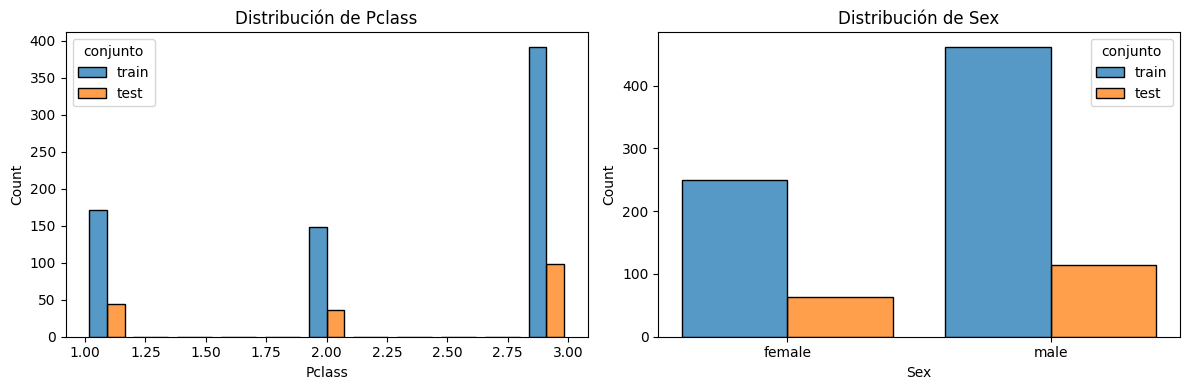

In [6]:
strat_train_set['conjunto'] = 'train'
strat_test_set['conjunto'] = 'test'
# Combinar ambos para comparar
df_check = pd.concat([strat_train_set, strat_test_set])

# Comparar distribución de 'Pclass' por conjunto
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=df_check, x="Pclass", hue="conjunto", multiple="dodge", shrink=0.8)
plt.title("Distribución de Pclass")

plt.subplot(1, 2, 2)
sns.histplot(data=df_check, x="Sex", hue="conjunto", multiple="dodge", shrink=0.8)
plt.title("Distribución de Sex")

plt.tight_layout()
plt.show()

In [7]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 513 to 782
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        163 non-null    object 
 11  Embarked     710 non-null    object 
 12  conjunto     712 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 77.9+ KB


In [ ]:
# Reimportar todo tras el reinicio del entorno
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# ------------------------
# Custom transformer for Age imputation by Pclass and Sex
# ------------------------
class GroupMedianAgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.medians = X.groupby(["Pclass", "Sex"])["Age"].median()
        return self

    def transform(self, X):
        X = X.copy()
        for (pclass, sex), median in self.medians.items():
            mask = (X["Pclass"] == pclass) & (X["Sex"] == sex) & (X["Age"].isna())
            X.loc[mask, "Age"] = xº
        return X

# ------------------------
# Custom transformer for extracting Title
# ------------------------
class TitleExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X["Title"] = X["Name"].str.extract(r',\s*([^\.]*)\.', expand=False)
        X["Title"] = X["Title"].apply(lambda x: x.strip() if x.strip() in ['Mr', 'Mrs', 'Miss', 'Master'] else 'Other')
        return X

# ------------------------
# Final preprocessor with Age imputation and Title handling
# ------------------------

# Columnas por tipo
scaled_num_features = ["Age", "Fare"]
unscaled_num_features = ["Pclass", "SibSp", "Parch"]
cat_features = ["Embarked", "Sex", "Title"]

# Pipelines numéricos
scaled_num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

unscaled_num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean"))
])

# Pipeline categórico
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='if_binary'))
])

# ColumnTransformer
preprocessor = ColumnTransformer([
    ("scaled_num", scaled_num_pipeline, scaled_num_features),
    ("unscaled_num", unscaled_num_pipeline, unscaled_num_features),
    ("cat", cat_pipeline, cat_features)
], remainder="drop")

# Pipeline completo con Title y Age imputados de forma personalizada
full_pipeline = Pipeline([
    ("extract_title", TitleExtractor()),
    ("impute_group_age", GroupMedianAgeImputer()),
    ("preprocessing", preprocessor)
])


In [ ]:
# 1. Definir X e y a partir del conjunto estratificado
X_train = strat_train_set.drop("Survived", axis=1)
y_train = strat_train_set["Survived"]

X_test = strat_test_set.drop("Survived", axis=1)
y_test = strat_test_set["Survived"]

# 2. Aplicar preprocesamiento al conjunto de entrenamiento
X_train_transformed = full_pipeline.fit_transform(X_train)
X_test_transformed = full_pipeline.transform(X_test)

# 4. Reconstruir DataFrames con nombres de columnas
#X_columns = ["Age", "Fare", "SibSp", "Parch", "Pclass", "Embarked_C", "Embarked_Q", "Embarked_S", "Sex_female", "Sex_male", "Title_Master", "Title_Miss", "Title_Mr", "Title_Mrs", "Title_Other"]
X_columns = preprocessor.get_feature_names_out()
X_columns = X_columns.tolist()
print(X_columns)

X_train_final = pd.DataFrame(X_train_transformed, columns=X_columns, index=X_train.index)
X_test_final = pd.DataFrame(X_test_transformed, columns=X_columns, index=X_test.index)

['scaled_num__Age', 'scaled_num__Fare', 'unscaled_num__Pclass', 'unscaled_num__SibSp', 'unscaled_num__Parch', 'cat__Embarked_C', 'cat__Embarked_Q', 'cat__Embarked_S', 'cat__Sex_male', 'cat__Title_Master', 'cat__Title_Miss', 'cat__Title_Mr', 'cat__Title_Mrs', 'cat__Title_Other']


In [24]:
X_train_final

,scaled_num__Age,scaled_num__Fare,unscaled_num__Pclass,unscaled_num__SibSp,unscaled_num__Parch,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Sex_male,cat__Title_Master,cat__Title_Miss,cat__Title_Mr,cat__Title_Mrs,cat__Title_Other
513,1.801617,0.533312,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
640,-0.651776,-0.502949,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
22,-1.012569,-0.499431,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
841,-0.940410,-0.449758,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
796,1.440824,-0.139575,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,0.286286,-0.504541,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
11,2.090252,-0.127094,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
786,-0.796093,-0.510154,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
495,-0.290983,-0.370182,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


array([[<Axes: title={'center': 'scaled_num__Age'}>,
        <Axes: title={'center': 'scaled_num__Fare'}>]], dtype=object)

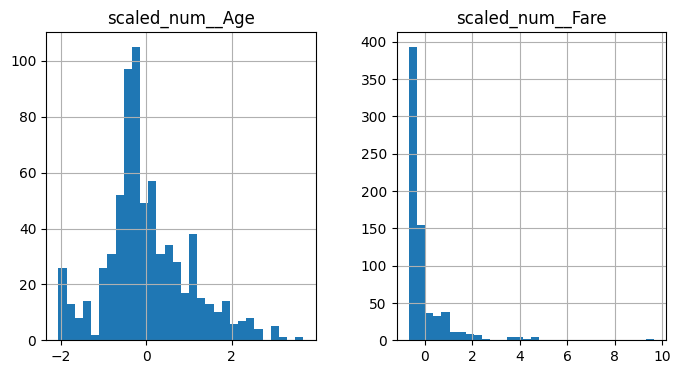

In [26]:
X_train_final.isna().sum().sum()
X_train_final[["scaled_num__Age","scaled_num__Fare"]].hist(figsize=(8, 4), bins=30)


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Crear el modelo
model = RandomForestClassifier(random_state=42)

# Validación cruzada con 5 particiones
scores = cross_val_score(model, X_train_final, y_train, cv=5, scoring="accuracy")
#cross_val_score(...) evalúa, pero no guarda el modelo entrenado, así que si luego haces

# Mostrar resultados
print("Precisión por partición:", scores)
print("Precisión media: {:.4f}".format(scores.mean()))
print("Desviación estándar: {:.4f}".format(scores.std()))


Precisión por partición: [0.85314685 0.82517483 0.8028169  0.78169014 0.76056338]
Precisión media: 0.8047
Desviación estándar: 0.0324


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Modelo base
rf = RandomForestClassifier(random_state=42)

# Rejilla de hiperparámetros
param_grid = {
    "n_estimators": [50, 100, 200],         # Número de árboles
    "max_depth": [None, 5, 10, 20],         # Profundidad máxima
    "min_samples_split": [2, 5, 10],        # Mínimo para dividir nodo
    "min_samples_leaf": [1, 2, 4],          # Mínimo en una hoja
    "max_features": ["sqrt", "log2"]        # Número de features en cada split
}

# Búsqueda con validación cruzada
grid_search_rf = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

# Entrenar
grid_search_rf.fit(X_train_final, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [29]:
print("Mejores hiperparámetros:", grid_search_rf.best_params_)
print("Precisión (CV):", grid_search_rf.best_score_)


Mejores hiperparámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Precisión (CV): 0.8439968482222003


In [30]:
from sklearn.metrics import accuracy_score

best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_final)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy en test con RandomForest optimizado: {:.4f}".format(acc_rf))


Accuracy en test con RandomForest optimizado: 0.8101


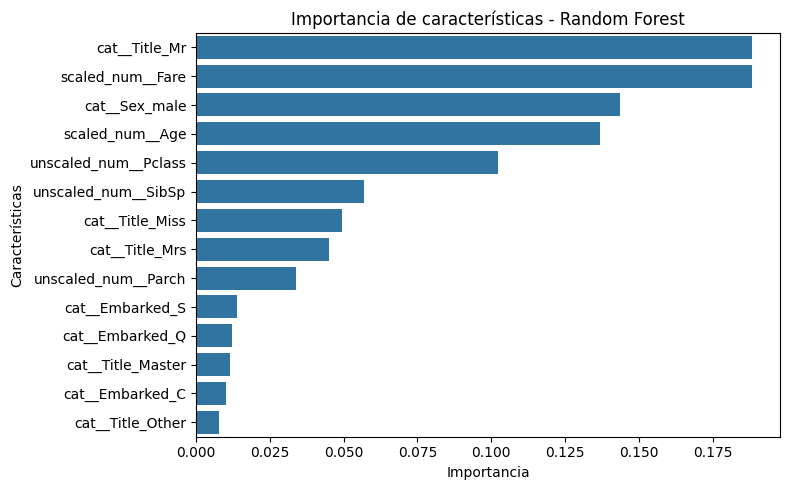

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener importancia
rf_importances = best_rf_model.feature_importances_

# Asociar a nombres
rf_features = pd.Series(rf_importances, index=X_train_final.columns).sort_values(ascending=False)

# Visualizar
plt.figure(figsize=(8, 5))
sns.barplot(x=rf_features, y=rf_features.index)
plt.title("Importancia de características - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.tight_layout()
plt.show()


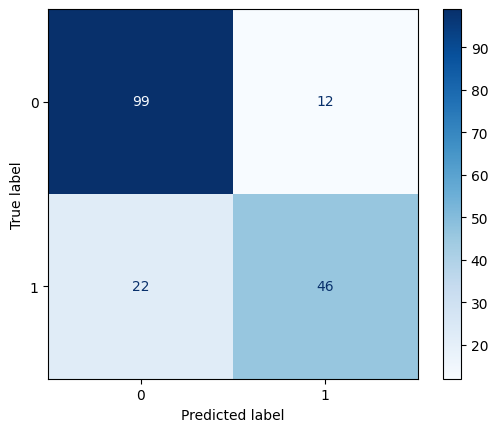

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predecir en el conjunto de test
y_pred_rf = best_rf_model.predict(X_test_final)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)

# Visualizar
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_)
disp.plot(cmap="Blues")


In [36]:
# Filtrar por condiciones específicas
candidatas = test_data[
    (test_data["Sex"] == "female") &
    (test_data["Age"] < 30) &
    (test_data["Pclass"] == 1)
]
print("Candidatas para supervivencia:", candidatas) 
print("Número de candidatas:", len(candidatas)) 

Candidatas para supervivencia:      PassengerId  Pclass                                               Name  \
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
26           918       1                       Ostby, Miss. Helene Ragnhild   
53           945       1                         Fortune, Miss. Ethel Flora   
92           984       1               Davidson, Mrs. Thornton (Orian Hays)   
150         1042       1              Earnshaw, Mrs. Boulton (Olive Potter)   
156         1048       1                                  Bird, Miss. Ellen   
182         1074       1  Marvin, Mrs. Daniel Warner (Mary Graham Carmic...   
184         1076       1  Douglas, Mrs. Frederick Charles (Mary Helene B...   
231         1123       1                           Willard, Miss. Constance   
272         1164       1      Clark, Mrs. Walter Miller (Virginia McDowell)   
364         1256       1       Harder, Mrs. George Achilles (Dorothy Annan)   
395         1287     

In [37]:
# Escoger la primera coincidencia
pasajera = candidatas.iloc[[0]]  # ¡Ojo! [[0]] mantiene formato DataFrame
print("Pasajera seleccionada para predicción:")
print(pasajera) 

Pasajera seleccionada para predicción:
    PassengerId  Pclass                                           Name  \
12          904       1  Snyder, Mrs. John Pillsbury (Nelle Stevenson)   

       Sex   Age  SibSp  Parch Ticket     Fare Cabin Embarked  
12  female  23.0      1      0  21228  82.2667   B45        S  


In [40]:
X_pasajera = full_pipeline.transform(pasajera)
X_cols = full_pipeline.named_steps["preprocessing"].get_feature_names_out()
# Convertir la fila transformada en DataFrame con nombres
X_pasajera_df = pd.DataFrame(X_pasajera, columns=X_cols)
prediccion = best_rf_model.predict(X_pasajera_df)
proba = best_rf_model.predict_proba(X_pasajera_df)
print(f"¿Sobrevive? {prediccion[0]} — Probabilidades [No, Sí]: {proba[0]}")


¿Sobrevive? 1 — Probabilidades [No, Sí]: [0.06871002 0.93128998]


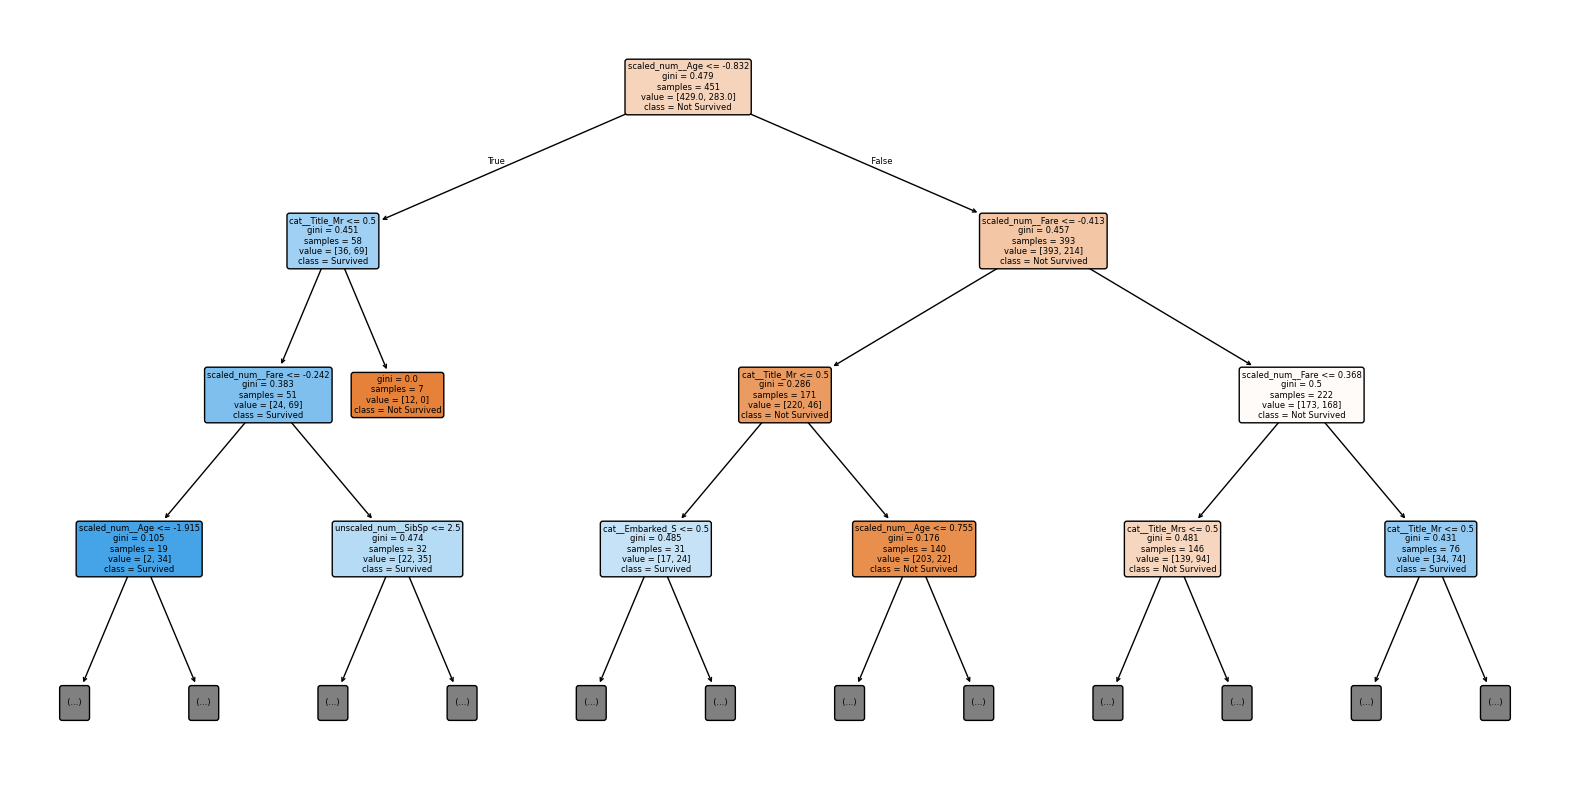

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Elegir uno de los árboles del bosque (por ejemplo, el primero)
estimator = best_rf_model.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(estimator, 
          feature_names=full_pipeline.named_steps["preprocessing"].get_feature_names_out(), 
          class_names=["Not Survived", "Survived"], 
          filled=True, rounded=True, max_depth=3)
plt.show()
